### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Чтобы определиться с параметрами будущей модели необходимо провести разведывательный анализ данных и составить отчёт по его результатам. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
math = pd.read_csv('stud_math.xls')

In [3]:
display(math.head(5))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из информации, приведенной выше, следует, что в датасете есть 13 столбцов с числовыми переменными и 17 солбцов с номинативными переменными.

## 1) Рассмотрим числовые переменные

In [4]:
# Создадим функцию показывающую распределение признаков
def get_info(column):
    result = display(pd.DataFrame(column.value_counts()))
    return result

In [5]:
get_info(math.age)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

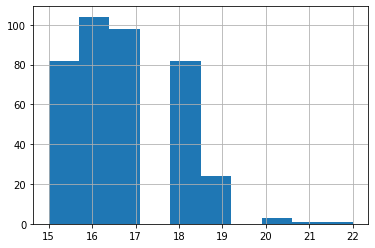

In [6]:
math.age.hist()
math.age.describe()

В условии задания сказано, что рассматриваемый возраст учащихся - от 15 до 22 лет. Средний возраст учащихся - 16.7 лет, медианный возраст - 17 лет.

In [7]:
get_info(math.Medu)
math.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

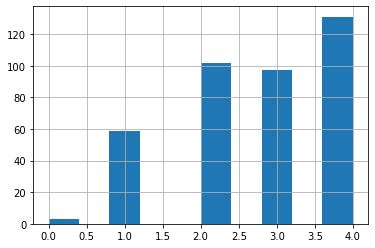

In [8]:
math.Medu.hist()
math.Medu.describe()

Среднее значение уровня образования матерей - 2,75, а медианное значение уровня образования матерей - 3 (среднее специальное). В датасете отсутствуют 3 значения, это не критично, ничего с ними не делаем.

In [9]:
get_info(math.Fedu)
math.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Как видно в датасете есть ошибка - уровень оразования не может быть 40, избавимся от этого значения


In [10]:
math.Fedu = math.Fedu.apply(lambda x: None if x == 40.0 else x)

In [11]:
get_info(math.Fedu)
math.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

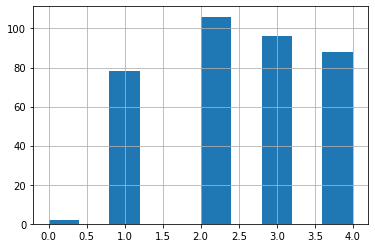

In [12]:
math.Fedu.hist()
math.Fedu.describe()

Средний уровень образоваия отцов - 2,51, а медианное значение уровня образования отцов - 2 (5-9 классы). Это ниже, чем у матерей.

In [13]:
get_info(math.traveltime)
math.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

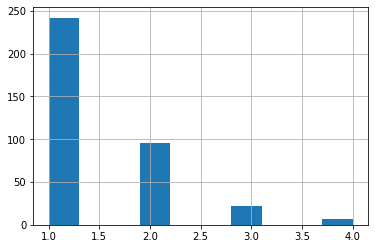

In [14]:
math.traveltime.hist()
math.traveltime.describe()

Из приведенной выше информации видно, что большинство учеников живут недалеко от школы и добираются до школы за время менее 15 минут

In [15]:
get_info(math.studytime)
math.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

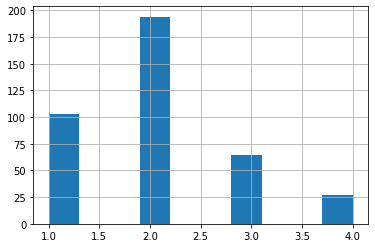

In [16]:
math.studytime.hist()
math.studytime.describe()

Из приведенной выше информации видно, что большинство учеников тратят на учебу от 2 до 5 часов в неделю

In [17]:
get_info(math.failures)
math.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

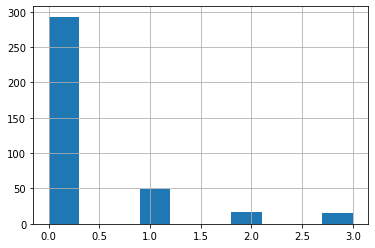

In [18]:
math.failures.hist()
math.failures.describe()

Количество внеучебных неудач для большинства учеников равно 0.

In [19]:
get_info(math.famrel)
math.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Как видно в данных есть ошибка - значение -1, избавимся от него 

In [20]:
math.famrel = math.famrel.apply(lambda x: None if x == -1.0 else x)

In [21]:
get_info(math.famrel)
math.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    367.000000
mean       3.950954
std        0.891853
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

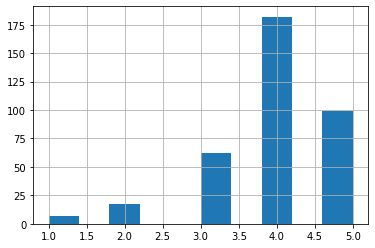

In [22]:
math.famrel.hist()
math.famrel.describe()

У большинства учеников хорошие отношения с родителями, среднее значение показателя - 3.95

In [23]:
get_info(math.freetime)
math.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

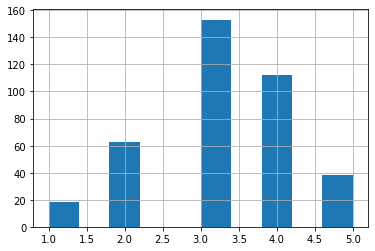

In [24]:
math.freetime.hist()
math.freetime.describe()

У большинства учеников достаточно свободного времени, среднее значение показателя - 3.23

In [25]:
get_info(math.goout)
math.loc[:, ['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

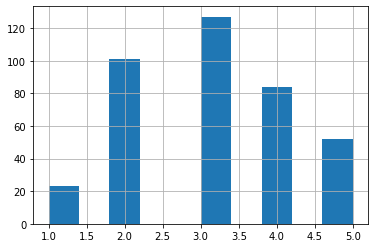

In [26]:
math.goout.hist()
math.goout.describe()

Большинство учеников проводят достаточно времени с друзьями, среднее значение показателя - 3.10

In [27]:
get_info(math.health)
math.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

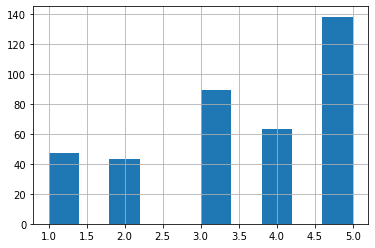

In [28]:
math.health.hist()
math.health.describe()

У большинства учеников неплохое здоровье, среднее значение показателя - 3.53

In [29]:
get_info(math.absences)
math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


В статистике количества пропущенных значений достаточно большой разброс данных. Найдем выбросы и исключим из датасета учеников с слишком большим количеством пропущенных занятий

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


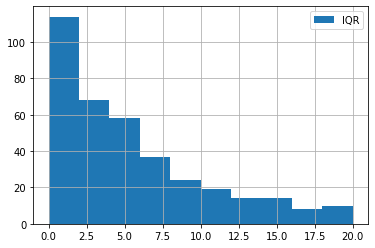

In [30]:
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
abs25 = math.absences.quantile(0.25)
abs75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(abs25), '75-й перцентиль: {},'.format(abs75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=abs25 - 1.5*IQR, l=abs75 + 1.5*IQR))
 
math.absences.loc[math.absences.between(abs25 - 1.5*IQR, abs75 + 1.5*IQR)].hist(bins = 10, range = (0, 20), label = 'IQR')
 
plt.legend();

In [31]:
math = math.loc[math.absences.between(0, abs75 + 1.5*IQR)]

In [32]:
get_info(math.absences)
math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

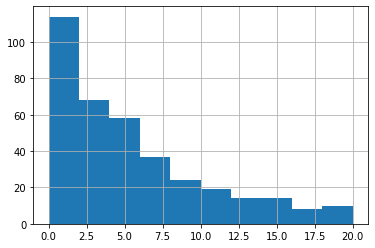

In [33]:
math.absences.hist()
math.absences.describe()

Как вивидно из статистики в среднем ученики пропускают 4.6 занятий

In [34]:
get_info(math.score)
math.loc[:, ['score']].info()

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

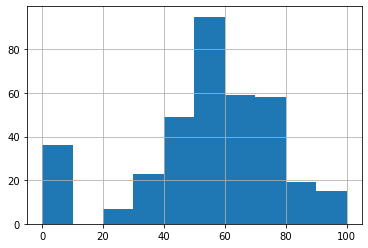

In [35]:
math.score.hist()
math.score.describe()

Средний балл на госэкзамене по математике составил 52 балла, медианное значение - 55 баллов

В датасете есть столбец 'studytime, granular'. Информации о данном столбце в условиях задания не приведено, значения данного столбца невозможно интерпретировать, поэтому удалим его из датасета

In [36]:
math.drop(['studytime, granular'], inplace = True, axis = 1)

## 2) Рассмотрим номинативные переменные

In [37]:
get_info(math.school)
math.loc[:, ['school']].info()

,school
GP,322
MS,44


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  366 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


В датасете представлены ученики из 2 школ с аббревиатурами GP и MS. Большинство учеников учатся в школе GP

In [38]:
get_info(math.sex)
math.loc[:, ['sex']].info()

,sex
F,191
M,175


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     366 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


В датасете девочек (191 человек) немного больше чем мальчиков (175 человек)

In [39]:
get_info(math.address)
math.loc[:, ['address']].info()

,address
U,273
R,78


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  351 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


В датасете представлены ученики в основном живущие в городе

In [40]:
get_info(math.famsize)
math.loc[:, ['Pstatus']].info()

,famsize
GT3,245
LE3,99


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  328 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Большинство семей, в которых живут ученики, состоят более чем из 3 человек

In [41]:
get_info(math.Pstatus)
math.loc[:, ['Pstatus']].info()

,Pstatus
T,296
A,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  328 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Родители большинства учеников живут вместе

In [42]:
get_info(math.Mjob)
math.loc[:, ['Mjob']].info()

,Mjob
other,123
services,88
at_home,55
teacher,52
health,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    350 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


<AxesSubplot:>

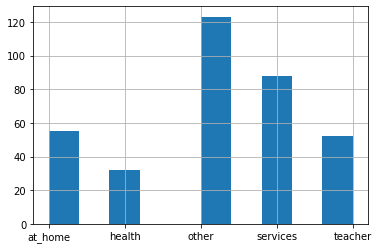

In [43]:
math.Mjob.hist()

У большинства учеников матери работают на других работах, не указанных в условии. На втором месте - работы на гос. службе

In [44]:
get_info(math.Fjob)
math.loc[:, ['Fjob']].info()

,Fjob
other,185
services,92
teacher,25
at_home,16
health,14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    332 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


<AxesSubplot:>

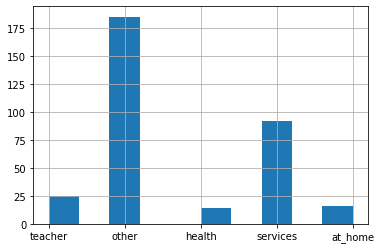

In [45]:
math.Fjob.hist()

У большинства учеников отцы работают на других работах, не указанных в условии. На втором месте - работы на гос. службе. Очень малое количество отцов работает в здравоохранении, либо находятся без работы

In [46]:
get_info(math.reason)
math.loc[:, ['reason']].info()

,reason
course,129
home,94
reputation,94
other,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  349 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Самая популярная причина выбора школы - образовательная программа

In [49]:
get_info(math.guardian)
math.loc[:, ['guardian']].info()

,guardian
mother,229
father,83
other,24


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  336 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


У большинства учеников опекун - мать

In [50]:
get_info(math.schoolsup)
math.loc[:, ['schoolsup']].info()

,schoolsup
no,310
yes,47


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  357 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


У большинства учеников отсутствует дополнительная образовательная поддержка

In [51]:
get_info(math.famsup)
math.loc[:, ['famsup']].info()

,famsup
yes,204
no,127


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  331 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


У большинства учеников есть семейная образовательная поддержка

In [52]:
get_info(math.paid)
math.loc[:, ['paid']].info()

,paid
no,189
yes,139


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    328 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Большинство учеников не посещают дополнительные платные занятия по математике

In [53]:
get_info(math.activities)
math.loc[:, ['activities']].info()

,activities
yes,184
no,168


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  352 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Большинство учеников посещают дополнительные внеучебные занятия

In [54]:
get_info(math.nursery)
math.loc[:, ['nursery']].info()

,nursery
yes,277
no,73


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  350 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Большинство учеников посещали детский сад

In [55]:
get_info(math.higher)
math.loc[:, ['higher']].info()

,higher
yes,332
no,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  348 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Большинство учеников хотят получить высшее образование

In [56]:
get_info(math.internet)
math.loc[:, ['internet']].info()

,internet
yes,279
no,55


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  334 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


У большинства учеников есть интернет дома

In [57]:
get_info(math.romantic)
math.loc[:, ['romantic']].info()

,romantic
no,225
yes,111


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  336 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Большинство учеников не состоят в романтических отношениях

## 3) Проведем корреляционный анализ количественных переменных

In [58]:
correlation = math.corr()

In [59]:
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.181020,0.085659,0.003035,0.195400,0.059219,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.634066,-0.197009,0.085532,-0.249754,-0.030272,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.181020,0.634066,1.000000,-0.156697,0.000510,-0.288524,-0.040042,-0.016101,0.033678,0.022589,-0.021415,0.112264
traveltime,0.085659,-0.197009,-0.156697,1.000000,-0.093825,0.085026,-0.032677,-0.008602,0.031481,-0.006809,-0.047995,-0.074045
studytime,0.003035,0.085532,0.000510,-0.093825,1.000000,-0.174802,0.018376,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.288524,0.085026,-0.174802,1.000000,0.033541,0.098642,0.085448,0.084991,0.081801,-0.329542
famrel,0.059219,-0.030272,-0.040042,-0.032677,0.018376,0.033541,1.000000,0.166362,0.084396,0.092425,-0.073509,0.057343
freetime,0.058193,0.027861,-0.016101,-0.008602,-0.136510,0.098642,0.166362,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.033678,0.031481,-0.034197,0.085448,0.084396,0.289474,1.000000,0.002320,0.111587,-0.122246
health,-0.067958,-0.052316,0.022589,-0.006809,-0.090552,0.084991,0.092425,0.038437,0.002320,1.000000,-0.014358,-0.057202


Выберем из полученной таблицы наиболее коррелируемые с показателем "score" переменные, отфильтовав полученные данные. Установим, что показатель корелляции должен быть либо более 0,2 либо менее -0,2 

In [60]:
corr = correlation[(correlation.score > 0.2) | (correlation.score < -0.2)]

In [61]:
corr['score']

Medu        0.210257
failures   -0.329542
score       1.000000
Name: score, dtype: float64

#### В результате проведенного корреляционного анализа оставим две переменных - Medu, failures

## 4) Проанализируем номинативные переменные

Посмотрим, различаются ли распределения оценок в зависимости от значения номинативных переменных. 

In [62]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

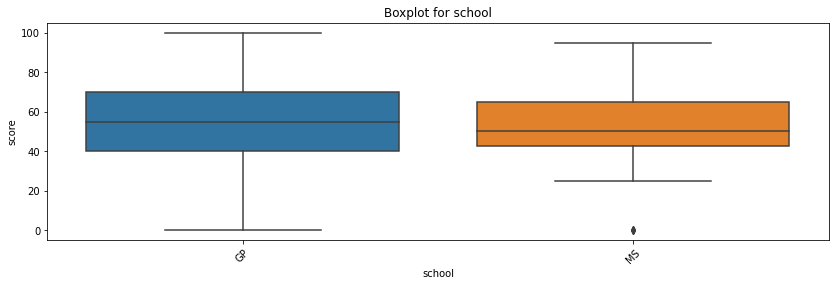

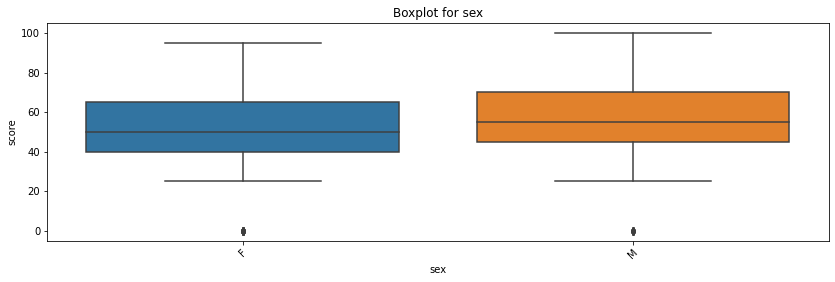

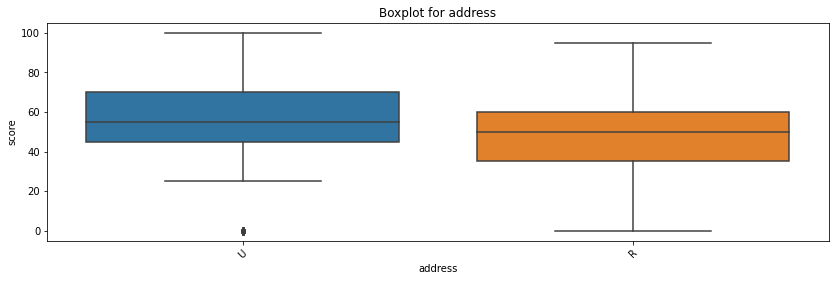

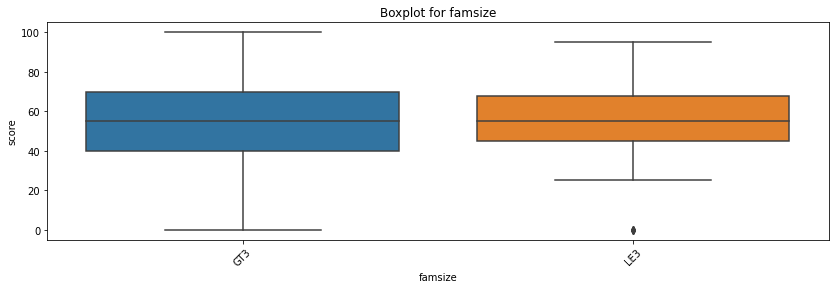

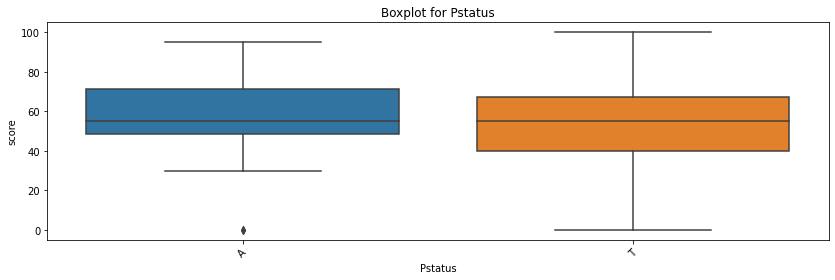

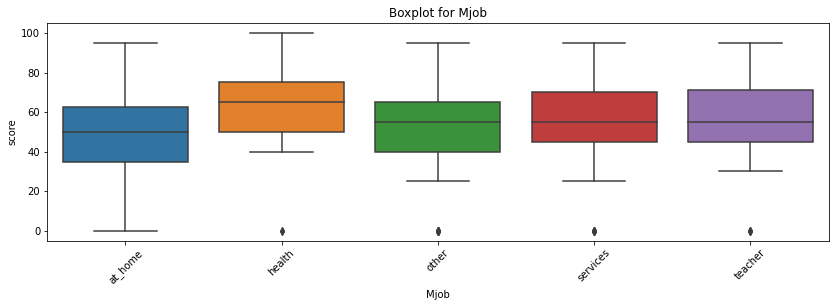

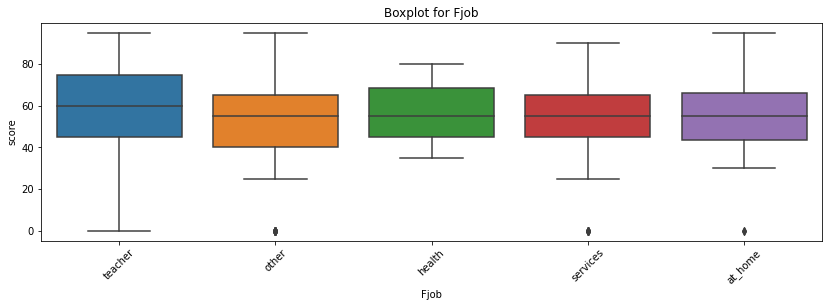

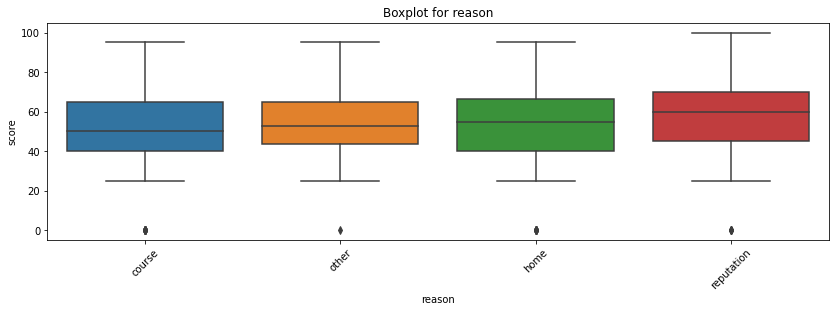

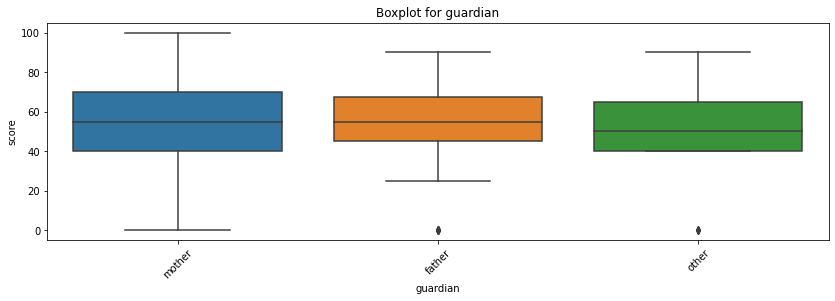

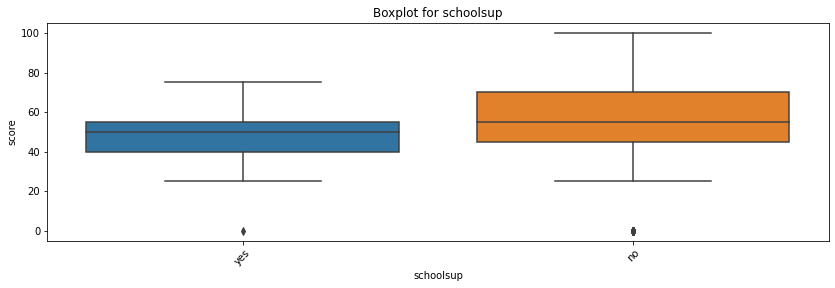

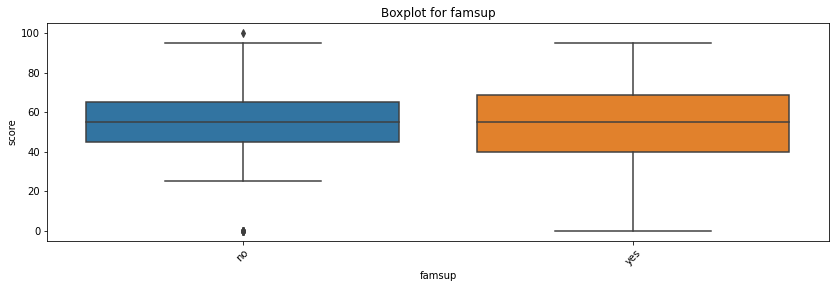

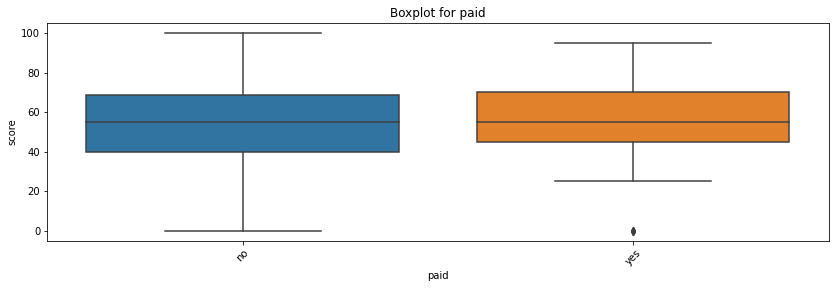

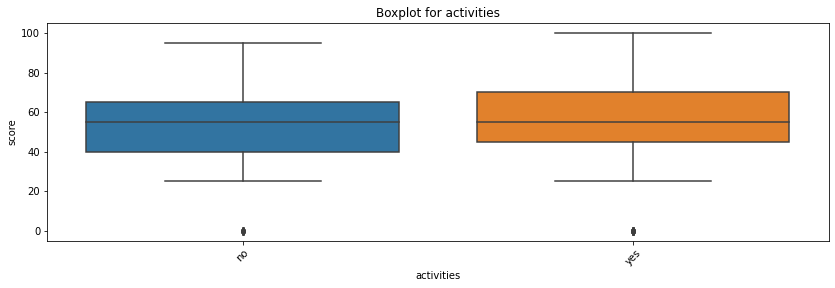

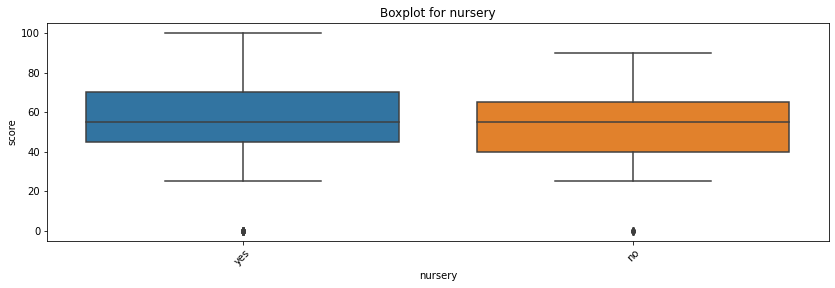

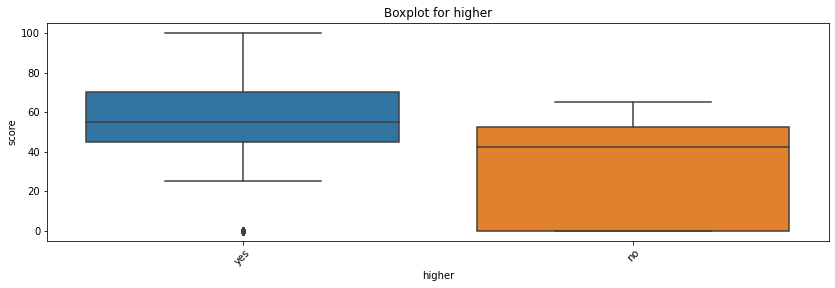

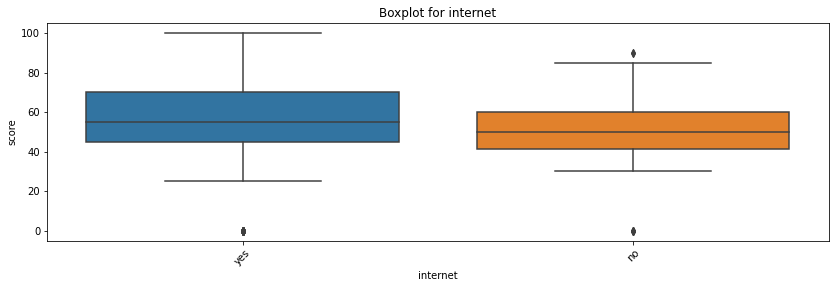

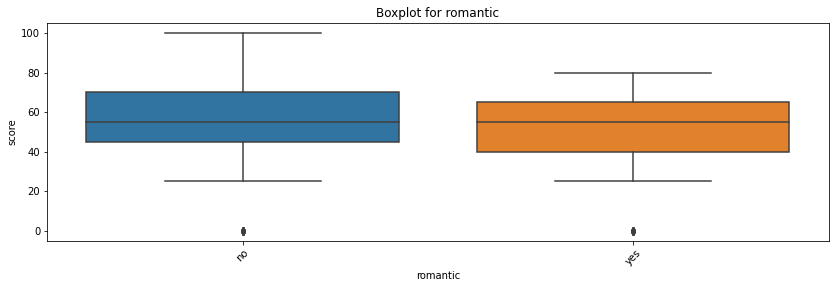

In [63]:
for col in ['school','sex', 'address','famsize','Pstatus', 
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [64]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [65]:
for col in ['school','sex', 'address','famsize','Pstatus', 
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


# Выводы

1. Качество данных удовлетворительное, количество пропусков в столбцах с данными не превышает 10%.

2. Было найдено два ошибочных значения - по одному в столбах Fedu и famrel

3. Определен столбец с неинтерпретируемыми данными - studytime, granular, данный столбец исключен из данных.

4. Найдены выбросы в данных по пропущенным занятиям, данные были очищены от выбросов.

 5. Выбраны 2 числовых переменных оказывающих влияние на балл на экзамене:
    1) При увеличении уровня образованности матерей (Medu) успеваемость учащихся также улучшается.
    2) При уменьшении количество внеучебных неудач (failure) успеваемость учащихся улучшается.

6. Выбрана 1 номинативная переменная, оказывающая влияние на балл на экзамене: Mjob (работа матери).

7.  Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это - Medu (образование матери), failures (количество внеучебных неудач), Mjob (работа матери)